In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task2-spills.ipynb")

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 3 GitHub repository:

**UPDATE THIS LINK**
https://github.com/aakriti-poudel-chhetri/eds220-hwk3


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html).

## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your commit history if you try to push them.

## 2. Datasets description
- Read the metadata for both datsets and write a brief description about each one. Indicate the date sources and date of access.

**First dataset: Oil spills data**
- This dataset contains records of spills involving petroleum and other hazardous materials. According to state law and regulations, any spill that has the potential to pollute land or water must be reported by the spiller, and in some cases, by anyone who has knowledge of the incident. Each spill record includes several pieces of information. These include administrative details, such as the DEC (Department of Environmental Conservation) region and a unique seven-digit spill number. The record also provides the name of the facility where the spill occurred, the date and time of the incident, and its location. Additional information includes the source and cause of the spill, the type and quantity of material spilled, the amount recovered, and the units of measurement. The record may also note any surface water bodies affected and the close date, which indicates when cleanup activities were completed and all documentation finalized.

**Data Source:** New York State Department of Environmental Conservation
**Date of Access:** November 07, 2025

**Second dataset: TIGER shapefile**

- TIGER (Topologically Integrated Geographic Encoding and Referencing) shape file provides U.S. Census Bureau geographic data. It contains GEOIDs that can be linked to census data.

**Data Source:** United States Census Bureau
**Date of Access:** November 07, 2025

# Complete Workflow

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


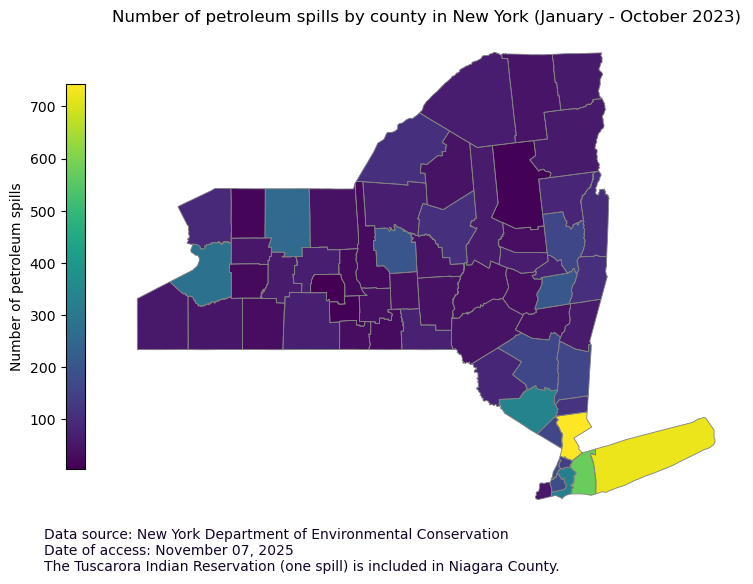

In [2]:
# Import libraries
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Read and clean the spills dataframe
spills = pd.read_csv(os.path.join('data', 'Spill_Incidents_20251111.csv'))
spills.columns = spills.columns.str.lower().str.replace(' ', '_')
counties = gpd.read_file(os.path.join('data', 'tl_2023_us_county', 'tl_2023_us_county.shp'))

# Convert spill_date column to datetime object
spills['spill_date'] = pd.to_datetime(spills['spill_date'], format='%m/%d/%Y')

# Select & aggegrate spills data to spills per county
spills_per_county = spills[(spills['spill_date'] >= '2023-01-01') & 
                           (spills['spill_date'] <= '2023-10-31') &
                           (spills['material_family'] == 'Petroleum')].groupby('county')['county'].value_counts().rename('n_spills')

# Update county name value for joining
spills_per_county.rename(index={'St Lawrence': 'St. Lawrence'}, inplace=True)

# Filter and join the counties data to NY counties 
ny_counties = counties[counties['STATEFP'] == '36'].merge(right = spills_per_county, left_on = 'NAME', right_on = 'county', how = 'inner')

# Add Tuscarora Indian Reservation spill to Niagara
ny_counties.loc[ny_counties['NAME'] == 'Niagara', 'n_spills'] += 1

# Plot choropleth map of the number of petroleum spills per county in the state of New York in 2023

fig, ax = plt.subplots(figsize = (10,10))
ax.axis ('off')

# Plot county boundaries seperately
ny_counties.boundary.plot(ax = ax, color = 'gray', linewidth = 0.6)

# Fill counties by number of spills
ny_counties.plot(ax = ax, column = 'n_spills', legend = True, cmap = 'viridis',
                 legend_kwds = {'shrink':0.5, 'label':'Number of petroleum spills', 'location':'left', 'pad':0.03})

plt.title('Number of petroleum spills by county in New York (January - October 2023)', size = 12)
plt.figtext(x = 0.20, y = 0.20,
            s = 'Data source: New York Department of Environmental Conservation\nDate of access: November 07, 2025\nThe Tuscarora Indian Reservation (one spill) is included in Niagara County.',
            color = '#130524')
plt.show()

## 3. Import libraries

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [4]:
# Read NYSDEC spill incidents using pandas
fp = os.path.join('data', 'Spill_Incidents_20251111.csv')
spills = pd.read_csv(fp)

# Read TIGER shapefiles using pandas
fp = os.path.join('data', 'tl_2023_us_county', 'tl_2023_us_county.shp')
counties = gpd.read_file(fp)

<!-- BEGIN QUESTION -->

## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head

b. Check the data types of the columns

c. Check the unique values in the `material_family` column

d. Check the unique values in the `county` column

e. Insert a markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells for preliminary data exploration.

In [5]:
#a. Check the dataframe's head
spills.head(5)

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10,Gallons,0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,NaN,0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,Pounds,0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1,Gallons,0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6,Gallons,6


In [6]:
#b. Check the data types of the columns
spills.dtypes

Spill Number              int64
Program Facility Name    object
Street 1                 object
Street 2                 object
Locality                 object
County                   object
ZIP Code                 object
SWIS Code                 int64
DEC Region                int64
Spill Date               object
Received Date            object
Contributing Factor      object
Waterbody                object
Source                   object
Close Date               object
Material Name            object
Material Family          object
Quantity                 object
Units                    object
Recovered                object
dtype: object

In [7]:
#c. Check the unique values in the `material_family` column
spills['Material Family'].unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [8]:
#d. Check the unique values in the `county` column
spills['County'].unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'Schuyler', 'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex',
       'Chenango', 'Erie', 'Livingston', 'Oneida', 'Wayne', 'Suffolk',
       'Orleans', 'Ontario', 'Genesee', 'Otsego', 'Tompkins', 'Madison',
       'Chemung', 'Seneca', 'Broome', 'Hamilton', 'Washington', 'Steuben',
       'Rensselaer', 'Franklin', 'Columbia', 'Fulton', 'Herkimer',
       'Schoharie', 'Montgomery', 'Putnam', 'Delaware',
       'New Jersey - Region 2', 'Tioga', 'Chautauqua', 'Cattaraugus',
       'Wyoming', 'Yates', 'Greene', 'Pennsylvania - Region 9',
       'Allegany', 'New Jersey - Region 3 (N)',
       'Cattaraugus Indian Reservation', 'New Jersey - Region 3 (T)',
       'Canada - Region 6', 'Canada - Region 9',
       '

e. Preliminary Data Exploration
- By checking the `head` of the `spills` dataframe, it can be observed that there are missing values in a dataframe represented by NaN.
- By exploring `dtypes` of the dataframe, it can be observed that 'Spill Date' and 'Received Date' column are stored as object rather than datetime. Likewise, and the 'Quantity' and 'Recovered' columns are stored as object rather than integer.
- The unique values in the `Material Family` column has 'Other', which is undefined.
- The unique values in the `County` column shows that there are data from other states as well such as New Jersey - Region 2, Pennsylvania - Region 9, Pennsylvania - Region 9, etc.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.B. Cleaning
a. Simplify column names as needed.

In [9]:
# Convert to lowercase and replace spaces with underscores
spills.columns = spills.columns.str.lower().str.replace(' ', '_')
spills.columns

Index(['spill_number', 'program_facility_name', 'street_1', 'street_2',
       'locality', 'county', 'zip_code', 'swis_code', 'dec_region',
       'spill_date', 'received_date', 'contributing_factor', 'waterbody',
       'source', 'close_date', 'material_name', 'material_family', 'quantity',
       'units', 'recovered'],
      dtype='object')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Update column data types as needed *for this analysis*.

In [10]:
# Convert date columns to datetime type
spills['spill_date'] = pd.to_datetime(spills['spill_date'], format='%m/%d/%Y')
spills['received_date'] = pd.to_datetime(spills['received_date'], format='%m/%d/%Y')
spills['close_date'] = pd.to_datetime(spills['close_date'], format='%m/%d/%Y')

spills.dtypes

spill_number                      int64
program_facility_name            object
street_1                         object
street_2                         object
locality                         object
county                           object
zip_code                         object
swis_code                         int64
dec_region                        int64
spill_date               datetime64[ns]
received_date            datetime64[ns]
contributing_factor              object
waterbody                        object
source                           object
close_date               datetime64[ns]
material_name                    object
material_family                  object
quantity                         object
units                            object
recovered                        object
dtype: object

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [11]:
# Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates)
petr_23 = spills[(spills['spill_date'] >= '2023-01-01') & 
                      (spills['spill_date'] <= '2023-10-31') &
                      (spills['material_family'] == 'Petroleum')].copy()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print a message verifying that `petr_23` only has data for 2023 and from January through October.
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`.

In [12]:
import calendar

# Extract unique years and months from the data
petr_23_year = petr_23.spill_date.dt.year.unique()
month_unique = np.sort(petr_23.spill_date.dt.month.unique())

# Print the unique years 
print(f'The spill_date column only has values from year {petr_23_year[0]}.\n')

# Convert month numbers to month names
first_month = calendar.month_name[month_unique[0]]
last_month = calendar.month_name[month_unique[-1]]

# Print the months 
print(f'The spill_date column has values from {first_month} to {last_month}.')

The spill_date column only has values from year 2023.

The spill_date column has values from January to October.


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [13]:
# Verify that petr_23 only has data for petroleum spills.
assert (petr_23['material_family'] == 'Petroleum').all(), "Error: Found non-petroleum spills in the data!"

print("Test passed! All spills are petroleum.")

Test passed! All spills are petroleum.


<!-- END QUESTION -->

### 5.D. Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Two columns only.
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.

In [14]:
# Create dataframe with two columns, one for count of spills per county, and one for county names
spills_per_county = petr_23.groupby('county').size().reset_index(name = 'n_spills')
spills_per_county

,county,n_spills
0,Albany,206
1,Allegany,30
2,Bronx,143
3,Broome,75
4,Cattaraugus,47
...,...,...
59,Washington,96
60,Wayne,38
61,Westchester,744
62,Wyoming,24


In [15]:
grader.check("q5d")

q5d results: All test cases passed!

<!-- BEGIN QUESTION -->

## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head

b. Check the data types of the columns

c. Check the geo-dataframe's CRS

d. Plot the geo-dataframe

e. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells of preliminary data exploration.

Preliminary Data Exploration
- Checking the `head` of the geo-dataframe shows that the names of all columns are in uppercase, except for the column geometry.
- By checking the `dtypes` of the geo-dataframe, it can be seen that columns with numeric values (such as STATEFP, COUNTYFP, COUNTYNS, GEOID, LSAD, etc.) are stored as objects.
- The `CRS` shows that the data uses an unprojected (2D) coordinate system.
- The `plot` shows that there are more counties than those of interest, which makes sense since the dataset includes county data for the entire United States. It also appears that some territories outside the 50 states are included in the data.

In [16]:
# a. Check the geo-dataframe's head
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [17]:
# b. Check the data types of the columns
counties.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [18]:
# c. Check the geo-dataframe's CRS
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

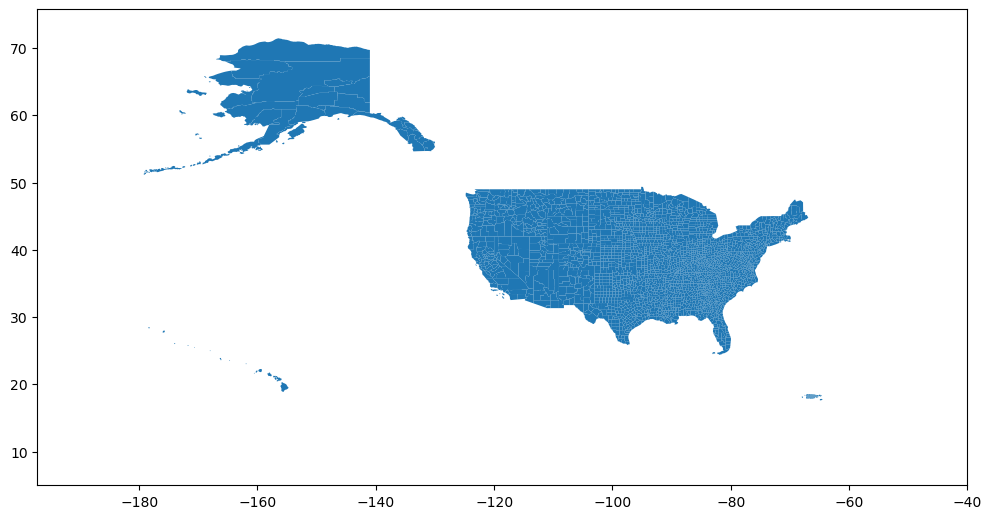

In [19]:
# d. Plot the geo-dataframe
fig, ax = plt.subplots(figsize = (12, 12))
counties.plot(ax = ax)

# Zoom into the map by setting limits
ax.set_xlim(right = -40)  # Crop from the right side
ax.set_ylim(bottom = 5)   # Crop from the bottom

plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [20]:
# Convert to lowercase
counties.columns = counties.columns.str.lower()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them (you may need to look at the metadata).

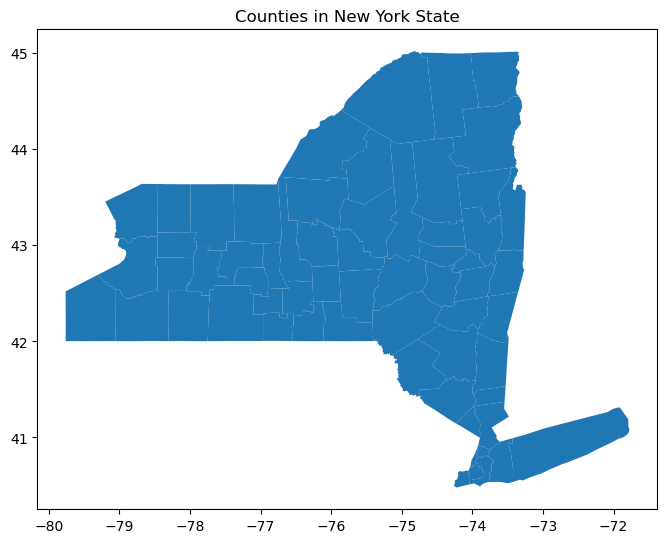

In [21]:
# Select all the counties for the state of New York
ny_counties = counties[counties["statefp"] == '36']

# Plot all the counties for the state of New York
fig, ax = plt.subplots(figsize = (8, 8))
ny_counties.plot(ax = ax)
ax.set_title('Counties in New York State', fontsize = 12)

plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.


In [22]:
# Print unique counties in ny_counties
print(np.sort(ny_counties['name'].unique()))

['Albany' 'Allegany' 'Bronx' 'Broome' 'Cattaraugus' 'Cayuga' 'Chautauqua'
 'Chemung' 'Chenango' 'Clinton' 'Columbia' 'Cortland' 'Delaware'
 'Dutchess' 'Erie' 'Essex' 'Franklin' 'Fulton' 'Genesee' 'Greene'
 'Hamilton' 'Herkimer' 'Jefferson' 'Kings' 'Lewis' 'Livingston' 'Madison'
 'Monroe' 'Montgomery' 'Nassau' 'New York' 'Niagara' 'Oneida' 'Onondaga'
 'Ontario' 'Orange' 'Orleans' 'Oswego' 'Otsego' 'Putnam' 'Queens'
 'Rensselaer' 'Richmond' 'Rockland' 'Saratoga' 'Schenectady' 'Schoharie'
 'Schuyler' 'Seneca' 'St. Lawrence' 'Steuben' 'Suffolk' 'Sullivan' 'Tioga'
 'Tompkins' 'Ulster' 'Warren' 'Washington' 'Wayne' 'Westchester' 'Wyoming'
 'Yates']


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.

In [23]:
# Make a copy of spills_per_county
spills_per_county_copy = spills_per_county.copy()

# Print unique counties in spills_per_county
print(spills_per_county_copy['county'].unique())

['Albany' 'Allegany' 'Bronx' 'Broome' 'Cattaraugus' 'Cayuga' 'Chautauqua'
 'Chemung' 'Chenango' 'Clinton' 'Columbia' 'Cortland' 'Delaware'
 'Dutchess' 'Erie' 'Essex' 'Franklin' 'Fulton' 'Genesee' 'Greene'
 'Hamilton' 'Herkimer' 'Jefferson' 'Kings' 'Lewis' 'Livingston' 'Madison'
 'Monroe' 'Montgomery' 'Nassau' 'New Jersey - Region 2' 'New York'
 'Niagara' 'Oneida' 'Onondaga' 'Ontario' 'Orange' 'Orleans' 'Oswego'
 'Otsego' 'Putnam' 'Queens' 'Rensselaer' 'Richmond' 'Rockland' 'Saratoga'
 'Schenectady' 'Schoharie' 'Schuyler' 'Seneca' 'St Lawrence' 'Steuben'
 'Suffolk' 'Sullivan' 'Tioga' 'Tompkins' 'Tuscarora Indian Reservation'
 'Ulster' 'Warren' 'Washington' 'Wayne' 'Westchester' 'Wyoming' 'Yates']


<!-- END QUESTION -->



c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 


In [24]:
# Find county names that are in spills_per_county_copy but not in ny_counties
diff_names_spills = np.setdiff1d(spills_per_county_copy['county'], ny_counties['name'])

# Convert to list of strings
diff_names_spills = diff_names_spills.tolist()

diff_names_spills

['New Jersey - Region 2', 'St Lawrence', 'Tuscarora Indian Reservation']

In [25]:
grader.check("7Ac")

7Ac results: All test cases passed!

d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [26]:
# Find county names that are in ny_counties but not in spills_per_county
diff_names_ny = np.setdiff1d(ny_counties['name'], spills_per_county_copy['county'])

# Convert to list of strings
diff_names_ny = diff_names_ny.tolist()

diff_names_ny

['St. Lawrence']

In [27]:
grader.check("7Ad")

7Ad results: All test cases passed!

e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [28]:
# e. 
# Select Tuscarora Indian Reservation row
tir = spills_per_county_copy.loc[spills_per_county_copy['county'] == 'Tuscarora Indian Reservation']

# Print first value in n_spills column
print(f"The number of spills in Tuscarora Indian Reservation is {tir['n_spills'].iloc[0]}")

The number of spills in Tuscarora Indian Reservation is 1


### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and Verify the update was successful.


In [29]:
# Update 'St Lawrence' to 'St. Lawrence'
spills_per_county_copy.loc[spills_per_county_copy['county'] == 'St Lawrence', 'county'] = 'St. Lawrence'

# Verify the change in name
spills_per_county_copy.loc[spills_per_county_copy['county'] == 'St. Lawrence', 'county'].iloc[0]

'St. Lawrence'

### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 


In [30]:
# Rename the 'name' column in ny_counties to 'county' to match spills_per_county
ny_counties = ny_counties.rename(columns = {"name": "county"})

b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [31]:
# Inner join with county column
ny_counties = ny_counties.merge(spills_per_county_copy,
                               on = 'county',
                               how = 'inner')


From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [32]:
# Current number of spills in Niagara county
niagara_before = ny_counties.loc[ny_counties['county'] == 'Niagara', 'n_spills'].iloc[0]

# Add one spill to Niagara county for Tuscarora Indian Reservation
ny_counties.loc[ny_counties['county'] == 'Niagara', 'n_spills'] += 1

# Get the updated number of spills in Niagara county 
niagara_after = ny_counties.loc[ny_counties['county'] == 'Niagara', 'n_spills'].iloc[0]

# Verify the update
print(f"{'Before:':<10} {niagara_before}")
print(f"{'After:':<10} {niagara_after}")

Before:    88
After:     89


## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation) and date of access



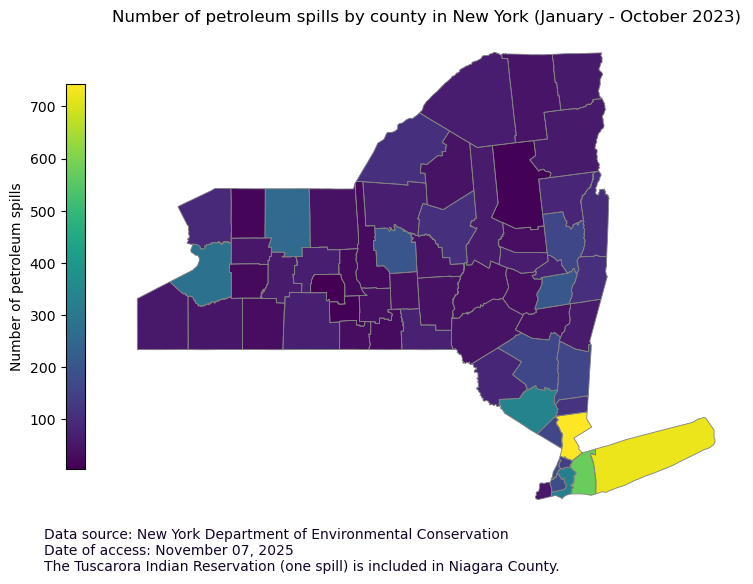

In [33]:
fig, ax = plt.subplots(figsize = (10,10))

ax.axis ('off')

# Plot county boundaries seperately
ny_counties.boundary.plot(ax = ax,
                          color = 'gray',
                          linewidth = 0.6)

# Fill counties by number of spills
ny_counties.plot(ax = ax,
                 column = 'n_spills',
                 legend = True,
                 cmap = 'viridis',
                 legend_kwds = {
                     'shrink':0.5,
                     'label':'Number of petroleum spills',
                     'location':'left',
                     'pad':0.03}
                )

plt.title('Number of petroleum spills by county in New York (January - October 2023)',
          size = 12)
plt.figtext(x = 0.20, y = 0.20,
            s = 'Data source: New York Department of Environmental Conservation\nDate of access: November 07, 2025\nThe Tuscarora Indian Reservation (one spill) is included in Niagara County.',
            color = '#130524')
plt.show()

b. Write a description of how the map was created, including key takeaways. If you need to do additional data analysis to include relevant information from the data, you may include additional cells here.

In [34]:
# Summary statistics for petroleum spills
total_spills = ny_counties['n_spills'].sum()
avg_spills = ny_counties['n_spills'].mean()

In [35]:
print(f" The total number of spills is: {total_spills}")

 The total number of spills is: 7222


In [36]:
print(f"The average spills per county is: {avg_spills:.1f}")

The average spills per county is: 116.5


In [37]:
print(f"\nTop 3 counties:")
print(ny_counties.nlargest(3, 'n_spills')[['county', 'n_spills']])


Top 3 counties:
         county  n_spills
23  Westchester       744
8       Suffolk       723
20       Nassau       576


This choropleth map shows how petroleum spills were distributed across New York State counties from January to October 2023. It was created by combining two datasets: the NYSDEC Spill Incidents database and the US Census Bureau’s TIGER/Line 2023 Counties shapefile. The data was prepared by filtering petroleum spills for the selected period, counting spills by county, fixing county name differences and joining the spill data with county boundaries. The Tuscarora Indian Reservation, which is within Niagara County was added to Niagara County’s total.

The summary statistics shows that the total number of spills is 7222. This choropleth map shows that most counties have a low number of petroleum spills. The map also highlights that a large number of spills occurred in Westchester (744), followed by Suffolk (723) and Nassau (576) in 2023.

## Complete workflow

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the choropleth map of the number of petroleum spills per county in the state of New York in 2023. The only ouput of this cell should be the choropleth map you produced in the previous exercise. Further guidance on what to include in this final workflow is in the assignment rubric.

##### Run the cell below to run all autograder tests. 

In [38]:
grader.check_all()

7Ac results: All test cases passed!

7Ad results: All test cases passed!

q5d results: All test cases passed!